In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df=pd.read_csv('twitter_validation.csv',encoding='ISO-8859-1',header=None) #in nlp file we define encoding=... as the review contains different types of text,numbers,..,to read this we use encoding
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df.columns=["id","social","target","text"]
df

,id,social,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,id,social,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,social,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.shape

(1000, 4)

In [7]:
df.columns


Index(['id', 'social', 'target', 'text'], dtype='object')

In [8]:
df.dtypes

id         int64
social    object
target    object
text      object
dtype: object

In [9]:
df.isna().sum()

id        0
social    0
target    0
text      0
dtype: int64

In [10]:
social=df['social'].value_counts()
social

social
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Facebook                             33
Verizon                              32
Hearthstone                          32
Overwatch                            32
CS-GO                                32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                            

<BarContainer object of 32 artists>

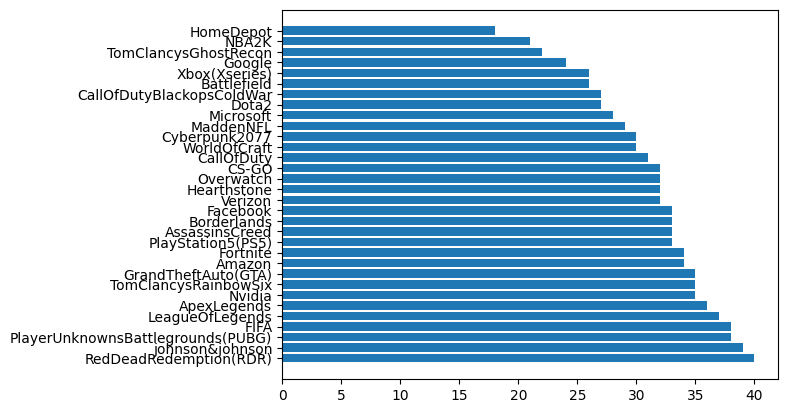

In [11]:
plt.barh(social.index,social.values)

In [12]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [13]:
#id and social columns are unwanted because for prediction we only need the target and text columns.
#we've to predict the review is Neutral,Poisitive,negative.
#But here there is an extra review called Irrelevant.
# So first we've to drop the irrelevant rows from the target column

In [14]:
df.drop(df.index[(df['target'] == 'Irrelevant')],inplace=True)
df

,id,social,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.shape

(828, 4)

In [16]:
#Here irrelevant is removed , but the index is not corrected. We"ve to use ignore_index == True or the below method

df.reset_index(drop=True,inplace=True)
df

,id,social,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
df.drop(['id','social'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [18]:
# In Target positive,negative and neutral are in objects.
# so we have to convert it into numerical 1,-1,0 respectively

# df['target'] = df['target'].replace({'Positive': 1,'Negative': -1,'Neutral': 0})
df['target'] = df['target'].map({'Positive': 1,'Negative': -1,'Neutral': 0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [19]:
df.dtypes

target     int64
text      object
dtype: object

In [20]:
#Now we've to apply nlp in text column

In [21]:
#Download the resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [22]:
#assign text column into a variable

tweets = df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [23]:
#lambda
#f=lambda num1,num2 : num1+num2



In [24]:
#Tokenization
# from nltk.tokenize import TweetTokenizer #for dataframe use TweetTokenizer
# tk=TweetTokenizer()
# tweets=tweets.apply(lambda x:tk.tokenize(x))
# tweets
# here the output is
# 0  [BBC, News, -, Amazon, boss, Jeff, Bezos, reje...
# 1  [@Microsoft, Why, do, I, pay, for, WORD, when,...
#..................

#But we want to join the tokens using a space 
#ie, 0   BBC News - Amazon boss Jeff Bezos rejects clai...
#    1   @Microsoft Why do I pay for WORD when it funct...

In [25]:
#Tokenization
from nltk.tokenize import TweetTokenizer #for dataframe use TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [26]:
#Remove Special Characters

tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)  #regex=True has to be used as a keyword
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [27]:
#A word is meaningful when it contains 3 minimum characters
#we've to check all the words and collect words with 3 or more characters.
#By doing this some stop words will remove

In [28]:
#Minimum character 3
#here we have to give the tokenisation code also

# tweets=tweets.apply(lambda x:i for i in tk.tokenize(x) if len(w)>=3).apply(lambda x:' '.join(x))

tweets=tweets.apply(lambda x:' '.join([i for i in tk.tokenize(x) if len(i)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [29]:
# Stemming
#snowball stemmer
from nltk.stem import SnowballStemmer
sb=SnowballStemmer('english') 
tweets=tweets.apply(lambda x:[sb.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [30]:
#Remove Stopwords

from nltk.corpus import stopwords
sp=stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in tk.tokenize(x) if i not in sp]).apply(lambda x: ' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [31]:
#Vectorization
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>

In [32]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [33]:
#Converting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=0)

In [34]:
# MODEL CREATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
nav=MultinomialNB()
sup=SVC()

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
dtc=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(random_state=0,n_estimators=200)
ab=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
xb=XGBClassifier(random_state=0)
lst=[knn,nav,sup,dtc,rf,ab,gb,xb]

In [36]:
for i in lst:
    print(i)
    i.fit(x_train, y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

          -1       0.46      0.63      0.53        75
           0       0.56      0.45      0.50        84
           1       0.55      0.48      0.51        90

    accuracy                           0.51       249
   macro avg       0.52      0.52      0.51       249
weighted avg       0.53      0.51      0.51       249

MultinomialNB()
              precision    recall  f1-score   support

          -1       0.55      0.61      0.58        75
           0       0.60      0.57      0.59        84
           1       0.63      0.60      0.61        90

    accuracy                           0.59       249
   macro avg       0.59      0.59      0.59       249
weighted avg       0.60      0.59      0.59       249

SVC()
              precision    recall  f1-score   support

          -1       0.59      0.51      0.55        75
           0       0.50      0.71      0.59        84
           1     

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]